<a href="https://colab.research.google.com/github/hetsuthar028/Banking-System/blob/master/DSML_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **DSML Case Study**

# **18012021083 | Het Suthar | EH2**

---

# **Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
%matplotlib inline
from tabulate import tabulate

# **Load Dataset**

In [ ]:
dataset = pd.read_csv("/content/parkinsons.data")

In [ ]:
dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# **Data Analysis & Preprocessing**

In [ ]:
dataset.shape

(195, 24)

In [ ]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
dataset.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

---

**Dropping Unwanted Columns**

---


In [ ]:
dataset = dataset.drop(['name'], axis = 1)
dataset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


---

**Seperate Dependent and Independent Attributes from Dataset**

---

In [ ]:
X = dataset.loc[:, dataset.columns !='status']
Y = dataset.loc[:, dataset.columns == 'status']

In [ ]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
Y

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


---

**Training and Testing Data Split**

---

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.20, random_state = 0)

In [ ]:
for i in [X_train, X_test, Y_train, Y_test]:
  print(i.shape)

(156, 22)
(39, 22)
(156, 1)
(39, 1)


In [ ]:
X_columns = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"]
table = tabulate(X_train, X_columns, tablefmt = "fancy_grid")
print(table)

╒═══════════════╤════════════════╤════════════════╤══════════════════╤════════════════════╤════════════╤════════════╤══════════════╤════════════════╤════════════════════╤════════════════╤════════════════╤════════════╤═══════════════╤═════════╤════════╤══════════╤══════════╤═══════════╤═══════════╤═════════╤══════════╕
│   MDVP:Fo(Hz) │   MDVP:Fhi(Hz) │   MDVP:Flo(Hz) │   MDVP:Jitter(%) │   MDVP:Jitter(Abs) │   MDVP:RAP │   MDVP:PPQ │   Jitter:DDP │   MDVP:Shimmer │   MDVP:Shimmer(dB) │   Shimmer:APQ3 │   Shimmer:APQ5 │   MDVP:APQ │   Shimmer:DDA │     NHR │    HNR │     RPDE │      DFA │   spread1 │   spread2 │      D2 │      PPE │
╞═══════════════╪════════════════╪════════════════╪══════════════════╪════════════════════╪════════════╪════════════╪══════════════╪════════════════╪════════════════════╪════════════════╪════════════════╪════════════╪═══════════════╪═════════╪════════╪══════════╪══════════╪═══════════╪═══════════╪═════════╪══════════╡
│       171.041 │        208.313 │      

---

**Scaling Dataset**

---

In [ ]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(X_train)
X_test = stdScaler.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.42106183,  0.05057195, -0.93690774, ..., -0.0748254 ,
         0.49483246, -0.64440366],
       [-0.95694554, -0.73133513, -0.10848063, ...,  0.00608646,
         0.11335106, -0.22920446],
       [ 1.21847901,  0.28739437, -0.67783415, ..., -0.22879857,
         0.17981954, -0.18449393],
       ...,
       [ 0.41390707,  2.52073344, -0.85166044, ...,  1.6624923 ,
         1.51751222,  0.85121716],
       [ 2.46491405,  0.59348186,  1.65322464, ..., -0.37747054,
        -0.99101608, -1.31837596],
       [-1.09278562, -0.91648442, -0.34208385, ..., -0.47870566,
        -1.36072382, -0.3488855 ]])

---

**Apply PCA (Principal Component Analysis)**

---

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = None)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)
# variance = pca.explained_variance_ratio_

In [ ]:
# variance

array([6.12879274e-01, 1.42119409e-01, 8.04083986e-02, 5.10794801e-02,
       3.51721211e-02, 2.03032686e-02, 1.57970795e-02, 1.39331015e-02,
       1.16955485e-02, 4.64453414e-03, 3.79679389e-03, 3.24282482e-03,
       1.96772834e-03, 1.25775746e-03, 6.75514427e-04, 4.40713431e-04,
       3.58973928e-04, 1.56341711e-04, 5.67932973e-05, 1.43095292e-05,
       3.26629676e-08, 1.16954208e-09])

---

**Correlation Analysis**

---

In [ ]:
dataset.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


---

**Correlation Plot**

---

Text(0.5, 1.0, 'Correlation Analysis')

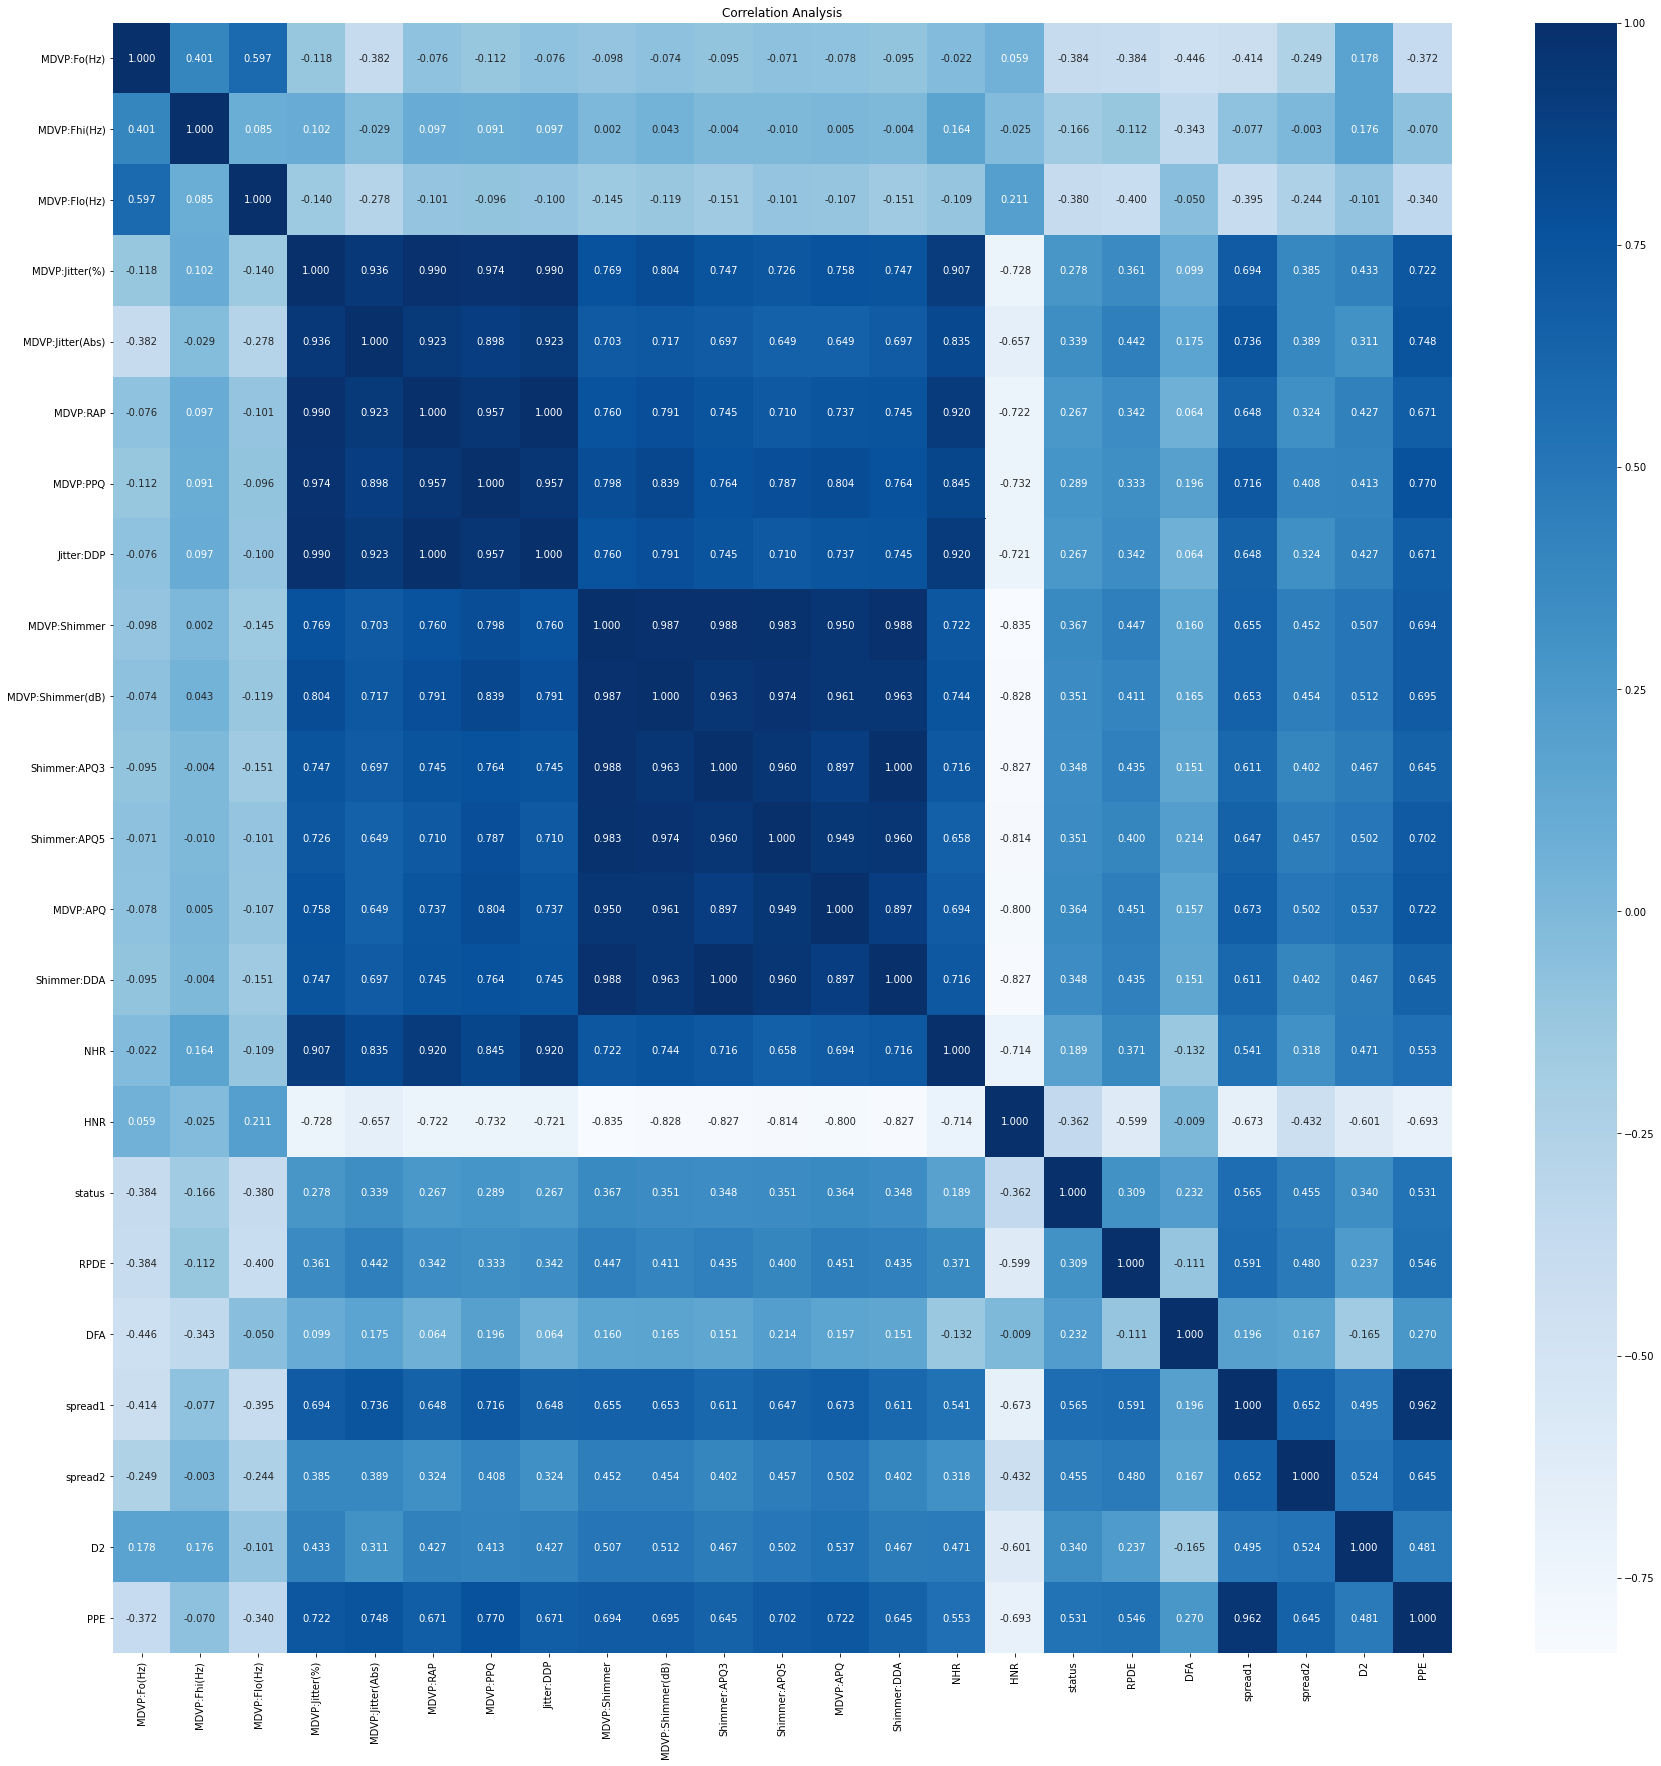

In [ ]:
plt.figure(figsize=(30, 30))

sns.heatmap(dataset.corr(),
            annot=True,fmt='0.3f',
            cmap='Blues')

plt.title('Correlation Analysis')

---

# **Support Vector Machine (SVM)**

---

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred = svc_model.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Accuracy: {svc_model.score(X_test, Y_test)}")
print(f"Classification Report: {classification_report(Y_test, Y_pred)}")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Testing Score: ", svc_model.score(X_train, Y_train))
print("Testing Score: ", svc_model.score(X_test, Y_test))

Accuracy: 0.9230769230769231
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

[[ 7  3]
 [ 0 29]]
Testing Score:  0.8974358974358975
Testing Score:  0.9230769230769231


---

# **Ensemble Learning Classifier**

1. Logistic Regression
2. Decision Tree Classifier
3. Support Vector Classifier (SVC)

---

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn import model_selection

In [ ]:
estimator = []
# Logistic Regression
lr = LogisticRegression(max_iter=100)
estimator.append(('Logistic Regression', lr))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=100, random_state=2021)
estimator.append(('Decision Tree', dt))

# Support Vector Machine
svm = SVC(C=100)
estimator.append(('SVM', svm))

# Define the Voting Classifier
vc = VotingClassifier(estimators=estimator, weights=[1, 1, 2])
eclf = vc.fit(X_train, Y_train)
print("Score:{0}".format(eclf.score(X_train, Y_train)))

Score:1.0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred = eclf.predict(X_test)
print("--------------------- Voting Classifier Report ---------------------")
print(f"Accuracy : {eclf.score(X_test, Y_test)}")
print(f"Classification Report :\n{classification_report(Y_test, Y_pred)}")
print("--------------------------------------------------------------------")

cm = confusion_matrix(Y_test, Y_pred)
cm

--------------------- Voting Classifier Report ---------------------
Accuracy : 0.8974358974358975
Cohen Kappa : 0.7475728155339806
Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

--------------------------------------------------------------------


array([[ 9,  1],
       [ 3, 26]])

# **Gradient Boosting Classifier**

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))
    print(confusion_matrix(Y_test, gb_clf.predict(X_test)))

Learning rate:  0.05
Accuracy score (training): 0.859
Accuracy score (validation): 0.846
[[ 4  6]
 [ 0 29]]
Learning rate:  0.075
Accuracy score (training): 0.878
Accuracy score (validation): 0.897
[[ 6  4]
 [ 0 29]]
Learning rate:  0.1
Accuracy score (training): 0.923
Accuracy score (validation): 0.923
[[ 7  3]
 [ 0 29]]
Learning rate:  0.25
Accuracy score (training): 0.974
Accuracy score (validation): 0.923
[[ 7  3]
 [ 0 29]]
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.897
[[ 7  3]
 [ 1 28]]
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.897
[[ 7  3]
 [ 1 28]]
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.821
[[ 5  5]
 [ 2 27]]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

# **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, Y_train)

Y_pred = knn_classifier.predict(X_test)
Y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)1
cm

array([[ 8,  2],
       [ 1, 28]])

In [ ]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("Classification Score: ", classification_report(Y_test, Y_pred))
print("Training Score: ", knn_classifier.score(X_train, Y_train))
print("Testing Score: ", knn_classifier.score(X_test, Y_test))

Accuracy:  0.9230769230769231
Classification Score:                precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Training Score:  0.9358974358974359
Testing Score:  0.9230769230769231
